# HW6 Solutions

## Problem 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

rawData = pd.read_csv('moviedata.csv')
rawData = rawData.dropna()
rawData.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [2]:
excellent = rawData.imdb_score >= 8
good = (rawData.imdb_score < 8) & (rawData.imdb_score >= 6)
average = (rawData.imdb_score < 6) & (rawData.imdb_score >= 4)
mediocre = (rawData.imdb_score < 4) & (rawData.imdb_score >= 2)
bad = rawData.imdb_score < 2


rawData.loc[excellent, 'imdb_labels'] = 'excellent'
rawData.loc[good, 'imdb_labels'] = 'good'
rawData.loc[average, 'imdb_labels'] = 'average'
rawData.loc[mediocre, 'imdb_labels'] = 'mediocre'
rawData.loc[bad, 'imdb_labels'] = 'bad'

rawData.groupby(['imdb_labels']).size()

imdb_labels
average       960
bad             3
excellent     212
good         2499
mediocre       82
dtype: int64

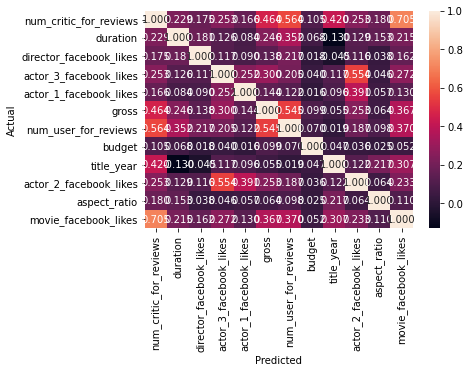

In [3]:
numCols=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes']

x = rawData[numCols]

sns.heatmap(x.corr(), annot=True, fmt=".3f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [4]:
#remove high colinear variables
filter=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio']

x = rawData[filter]
y = rawData['imdb_labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.6415261756876663
confusion_matrix
[[146   3 132   9]
 [  8  22  38   0]
 [138  36 549  17]
 [ 12   0  11   6]]


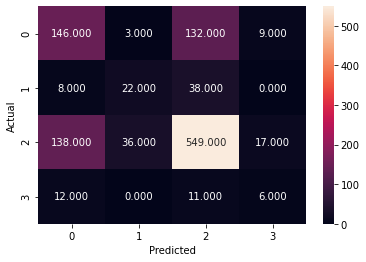

In [5]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt=".3f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Problem 2.

For CART models the gini index is the probability of uncertanty for a decision. This is used to calculate the gini impurity, which is more usefull to use since that's what we're using to reduce the impurity of our final decision. Gini impurity is the probability that a decision might misclassifiy the outcome and is weighted by the number of occurences of that dicision. CART works by trying to reduce the gini impurity as much as possible. With the gini impurity you'll see that it slowly increases then jumps down as you go along the tree. The algorithm selects the lowest avaible impurity to start with as that's it best decision at the time. As the tree grows more nodes the impurity will graduly decrease until we are out of decisions to make or a previous decision's impurity is lower then any other avaible decision's.

In [6]:
from sklearn import tree

In [7]:
print(cart.tree_.impurity)

[0.48398145 0.53717148 0.56306504 ... 0.18836565 0.         0.        ]


## Problem 3.

In [24]:
from sklearn.cluster import KMeans

filter2 = ['num_critic_for_reviews', 'gross', 'num_user_for_reviews', 'title_year']
x = rawData[filter2]

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

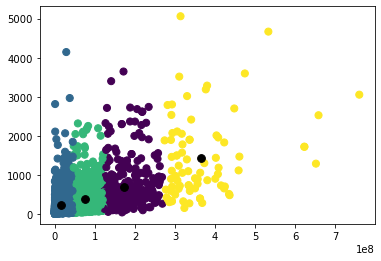

In [25]:
X=1
Y=2
plt.scatter(x[filter2[X]][:], x[filter2[Y]][:], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, X], centers[:, Y], c='black', s=60);

## Problem 4.

In [26]:
print('Euclidean distances between each pair')
for i in range(0, len(centers)):
    for j in range(i+1, len(centers)):
        dist = 0
        for k in range(0, len(centers[i])):
            dist += (centers[i,k] - centers[j,k])**2
        dist = dist**0.5
        print('Distance from', i, 'to', j, ':', dist)
    

Euclidean distances between each pair
Distance from 0 to 1 : 156972233.08865285
Distance from 0 to 2 : 98635107.02148563
Distance from 0 to 3 : 192591354.33855605
Distance from 1 to 2 : 58337126.06716867
Distance from 1 to 3 : 349563587.42718184
Distance from 2 to 3 : 291226461.3600262


In [27]:
print('Manhattan distances between each pair')
for i in range(0, len(centers)):
    for j in range(i+1, len(centers)):
        dist = 0
        for k in range(0, len(centers[i])):
            dist += abs(centers[i,k] - centers[j,k])
        print('Distance from', i, 'to', j, ':', dist)

Manhattan distances between each pair
Distance from 0 to 1 : 156972838.018628
Distance from 0 to 2 : 98635493.61161797
Distance from 0 to 3 : 192592218.60834575
Distance from 1 to 2 : 58337344.407010034
Distance from 1 to 3 : 349565056.62697375
Distance from 2 to 3 : 291227712.2199637


## Problem 5.

In [48]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
#h = 10     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x[filter2[X]].min() - 1, x[filter2[X]].max() + 1
y_min, y_max = x[filter2[Y]].min() - 1, x[filter2[Y]].max() + 1
xx, yy = np.meshgrid(x[filter2[X]], x[filter2[Y]])
print(xx.shape)

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.plot(x[filter2[X]], x[filter2[Y]], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

(3756, 3756)


ValueError: Incorrect number of features. Got 2 features, expected 4